### About the data:-

data.csv includes lastest edition FIFA 2019 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import cufflinks as cf

import plotly.express as px
import pandas_profiling as pf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [180]:
df = pd.read_csv("FIFA_data.csv")

In [181]:
df.loc[0]

Unnamed: 0                                                     0
ID                                                        158023
Name                                                    L. Messi
Age                                                           31
Photo             https://cdn.sofifa.org/players/4/19/158023.png
                                       ...                      
GKHandling                                                  11.0
GKKicking                                                   15.0
GKPositioning                                               14.0
GKReflexes                                                   8.0
Release Clause                                           €226.5M
Name: 0, Length: 89, dtype: object

In [182]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [183]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### Since there are many unnecessary columns
* We will drop that columns

In [184]:
df.drop(columns = ['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Loaned From'], axis=1, inplace=True)

In [185]:
df

Name  Age Nationality  Overall  Potential  \
0                L. Messi   31   Argentina       94         94   
1       Cristiano Ronaldo   33    Portugal       94         94   
2               Neymar Jr   26      Brazil       92         93   
3                  De Gea   27       Spain       91         93   
4            K. De Bruyne   27     Belgium       91         92   
...                   ...  ...         ...      ...        ...   
18202        J. Lundstram   19     England       47         65   
18203  N. Christoffersson   19      Sweden       47         63   
18204           B. Worman   16     England       47         67   
18205      D. Walker-Rice   17     England       47         66   
18206           G. Nugent   16     England       46         66   

                      Club    Value   Wage  Special Preferred Foot  ...  \
0             FC Barcelona  €110.5M  €565K     2202           Left  ...   
1                 Juventus     €77M  €405K     2228          Right  ...   
2      Paris Saint-Germain  €118.5M  €290K     2143          Right  ...   
3        Manchester United     €72M  €260K     1471          Right  ...   
4          Manchester City    €102M  €355K     2281          Right  ...   
...                    ...      ...    ...      ...            ...  ...   
18202      Crewe Alexandra     €60K    €1K     1307          Right  ...   
18203       Trelleborgs FF     €60K    €1K     1098          Right  ...   
18204     Cambridge United     €60K    €1K     1189          Right  ...   
18205      Tranmere Rovers     €60K    €1K     1228          Right  ...   
18206      Tranmere Rovers     €60K    €1K     1321          Right  ...   

       Composure  Marking  StandingTackle SlidingTackle GKDiving GKHandling  \
0           96.0     33.0            28.0          26.0      6.0       11.0   
1           95.0     28.0            31.0          23.0      7.0       11.0   
2           94.0     27.0            24.0          33.0      9.0        9.0   
3           68.0     15.0            21.0          13.0     90.0       85.0   
4           88.0     68.0            58.0          51.0     15.0       13.0   
...          ...      ...             ...           ...      ...        ...   
18202       45.0     40.0            48.0          47.0     10.0       13.0   
18203       42.0     22.0            15.0          19.0     10.0        9.0   
18204       41.0     32.0            13.0          11.0      6.0        5.0   
18205       46.0     20.0            25.0          27.0     14.0        6.0   
18206       43.0     40.0            43.0          50.0     10.0       15.0   

      GKKicking  GKPositioning GKReflexes Release Clause  
0          15.0           14.0        8.0        €226.5M  
1          15.0           14.0       11.0        €127.1M  
2          15.0           15.0       11.0        €228.1M  
3          87.0           88.0       94.0        €138.6M  
4           5.0           10.0       13.0        €196.4M  
...         ...            ...        ...            ...  
18202       7.0            8.0        9.0          €143K  
18203       9.0            5.0       12.0          €113K  
18204      10.0            6.0       13.0          €165K  
18205      14.0            8.0        9.0          €143K  
18206       9.0           12.0        9.0          €165K  

[18207 rows x 83 columns]

## Performing the data cleaning

1. Cleaning the euro values from Value, Wage and Release Clause   
2. Rating the Work Rate in terms of numeric values


In [186]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', '

In [187]:
df['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', nan], dtype=object)

In [188]:
work_rate_dict = {'Medium/ Medium': 6,'High/ Low':8 ,'High/ Medium':9 ,'High/ High':10 ,'Medium/ High':7 ,'Medium/ Low':5 ,'Low/ High':4, 'Low/ Medium':3 ,'Low/ Low':2 }

In [189]:
def euro_clean(x):
    if type(x) is float:
        return np.NaN

    x = x[1::]
    if x[-1] == 'K':  x = float(x[:-1])*1000
    elif x[-1] == 'M': x = float(x[:-1])*1000000
    else: x = np.NaN
    return x


def work_rate_clean(x):
    if type(x) is float:
        return np.NaN
    return work_rate_dict[x]

def height_to_cm(x):
    if type(x) is float:
        return np.NaN
    x,y = x.split('\'')
    x = x+"."+y
    x = float(x)*2.54
    return round(x,2)

def weight_clean(x):
    if type(x) is float:
        return np.NaN
    return x[:-3]

def experience(x,y):
    if type(x) is float:
        return np.NaN
    elif type(y) is float:
        y = 2022
    x = x[-4::]
    print(x,y)
    z = int(y) - int(x)
    return z

value_li = []
wage_li = []
release_li = []
work_rate_li = []
height_li = []
weight_li = []
experience_li = []

for i in range(df.shape[0]):
    value_li.append(euro_clean(df.iloc[i,6]))
    wage_li.append(euro_clean(df.iloc[i,7]))
    release_li.append(euro_clean(df.iloc[i,-1]))
    work_rate_li.append(work_rate_clean(df.iloc[i,13]))
    height_li.append(height_to_cm(df.iloc[i,20]))
    weight_li.append(weight_clean(df.iloc[i,21]))
    experience_li.append(experience(df.iloc[i,18], df.iloc[i,19]))
    

2004 2021
2018 2022
2017 2022
2011 2020
2015 2023
2012 2020
2012 2020
2014 2021
2005 2020
2014 2021
2014 2021
2014 2022
2010 2019
2010 2020
2016 2023
2015 2022
2010 2024
2014 2023
2014 2022
2018 2024
2008 2023
2013 2020
2011 2021
2011 2021
2005 2020
2018 2022
2017 2023
2013 2021
2010 2022
2013 2022
2013 2020
2018 2023
2018 2021
2016 2021
2007 2022
2013 2022
2012 2022
2012 2020
2012 2021
2018 2019
2016 2023
2013 2021
2014 2021
2016 2021
2014 2020
2017 2022
2016 2023
2012 2020
2013 2020
2012 2019
2007 2020
2014 2021
2008 2022
2016 2021
2017 2022
2017 2025
2016 2023
2018 2023
2015 2023
2015 2023
2011 2022
2012 2021
2015 2020
2018 2022
2008 2021
2013 2021
2012 2023
2012 2022
2018 2023
2015 2020
2016 2023
2014 2020
2013 2021
2013 2020
2018 2021
2017 2022
2015 2023
2015 2023
2013 2020
2018 2024
2015 2023
2013 2026
2018 2023
2010 2021
2011 2019
2017 2022
2014 2022
2015 2022
2011 2020
2017 2021
2018 2022
2014 2019
2011 2021
2018 2021
2015 2022
2015 2020
2015 2021
2018 2021
2018 2022
2016 2020


2015 2021
2012 2019
2017 2019
2013 2019
2007 2020
2017 2022
2013 2019
2015 2020
2017 2023
2016 2022
2016 2020
2016 2019
2017 2021
2018 2023
2016 2019
2018 2021
2018 2020
2015 2020
2017 2021
2015 2019
2012 2021
2015 2022
2017 2019
2018 2022
2017 2021
2017 2019
2008 2020
2015 2019
2018 2021
2016 2021
2017 2020
2018 2019
2009 2019
2014 2020
2018 2020
2012 2021
2018 2020
2017 2020
2017 2020
2015 2019
2018 2021
2018 2018
2018 2020
2018 2020
2017 2021
2016 2020
2018 2022
2017 2021
2016 2020
2018 2021
2017 2022
2014 2023
2017 2021
2015 2019
2013 2020
2015 2021
2015 2020
2018 2021
2015 2022
2018 2020
2016 2021
2015 2021
2015 2020
2014 2020
2016 2019
2014 2020
2017 2020
2013 2022
2014 2021
2017 2022
2014 2022
2017 2020
2012 2019
2017 2022
2016 2021
2016 2019
2018 2022
2016 2021
2015 2022
2018 2022
2018 2023
2014 2019
2009 2019
2017 2022
2017 2021
2018 2021
2015 2019
2011 2019
2018 2022
2017 2019
2016 2019
2008 2021
2010 2022
2016 2021
2017 2021
2017 2020
2016 2023
2010 2019
2017 2020
2017 2020


2015 2019
2016 2020
2013 2020
2014 2021
2017 2020
2008 2020
2018 2020
2018 2022
2018 2023
2016 2020
2016 2020
2016 2020
2017 2021
2018 2021
2018 2021
2017 2023
2018 2023
2016 2019
2017 2021
2018 2022
2018 2023
2017 2021
2018 2022
2014 2020
2014 2019
2016 2021
2014 2020
2015 2023
2014 2021
2014 2020
2018 2023
2014 2019
2015 2023
2017 2019
2013 2020
2018 2021
2018 2020
2017 2019
2018 2019
2016 2020
2014 2019
2018 2021
2017 2022
2011 2020
2017 2020
2015 2020
2012 2022
2018 2021
2018 2021
2018 2020
2018 2020
2018 2021
2017 2019
2016 2019
2018 2020
2018 2020
2014 2021
2015 2023
2018 2020
2018 2022
2017 2021
2017 2019
2018 2022
2015 2021
2008 2020
2017 2021
2014 2020
2017 2020
2017 2020
2018 2021
2018 2022
2009 2020
2018 2021
2018 2023
2016 2020
2016 2020
2017 2019
2018 2021
2016 2020
2017 2021
2018 2021
2017 2022
2018 2021
2017 2020
2017 2020
2018 2022
2018 2021
2017 2019
2018 2019
2018 2023
2015 2020
2016 2022
2015 2024
2015 2021
2017 2019
2016 2021
2018 2023
2018 2022
2014 2020
2017 2020


2018 2022
2017 2021
2015 2023
2015 2019
2017 2020
2017 2019
2018 2020
2016 2021
2012 2019
2017 2019
2018 2021
2018 2022
2017 2020
2018 2021
2013 2021
2018 2020
2017 2021
2018 2018
2016 2020
2018 2020
2016 2022
2016 2019
2016 2019
2018 2023
2018 2022
2018 2022
2016 2020
2018 2021
2014 2019
2018 2020
2018 2023
2017 2021
2015 2019
2017 2021
2015 2019
2017 2018
2018 2023
2018 2021
2018 2019
2006 2021
2017 2019
2015 2019
2014 2021
2015 2020
2018 2023
2018 2021
2016 2020
2016 2020
2018 2022
2017 2019
2018 2021
2018 2022
2013 2021
2017 2021
2018 2019
2018 2020
2016 2019
2011 2021
2018 2023
2018 2022
2015 2020
2018 2022
2018 2022
2017 2023
2018 2022
2016 2020
2017 2019
2009 2021
2016 2019
2018 2021
2018 2021
2016 2019
2016 2023
2018 2022
2018 2022
2018 2019
2018 2022
2017 2021
2018 2021
2016 2021
2017 2019
2017 2021
2017 2019
2017 2021
2013 2019
2018 2022
2018 2021
2018 2022
2015 2019
2018 2022
2010 2022
2018 2020
2017 2019
2012 2019
2015 2023
2011 2019
2016 2023
2017 2019
2012 2019
2018 2021


2012 2020
2017 2023
2017 2021
2018 2019
2014 2021
2017 2020
2017 2019
2018 2023
2011 2020
2017 2020
2011 2020
2018 2020
2018 2020
2017 2023
2017 2019
2016 2021
2015 2020
2017 2020
2017 2019
2018 2019
2015 2019
2017 2019
2017 2023
2018 2021
2018 2019
2017 2018
2018 2020
2017 2019
2017 2021
2017 2021
2018 2021
2017 2019
2017 2022
2017 2020
2011 2019
2017 2018
2017 2021
2018 2019
2015 2021
2017 2021
2018 2023
2017 2021
2018 2020
2016 2019
2016 2020
2016 2020
2018 2021
2018 2022
2018 2018
2016 2021
2016 2021
2012 2020
2018 2021
2016 2019
2018 2019
2016 2019
2016 2023
2018 2018
2010 2019
2009 2023
2016 2020
2017 2019
2014 2020
2017 2019
2017 2020
2007 2019
2014 2019
2017 2022
2010 2021
2014 2020
2017 2020
2018 2022
2005 2021
2011 2020
2017 2020
2017 2020
2015 2020
2017 2020
2016 2021
2018 2019
2016 2021
2017 2020
2016 2020
2016 2019
2017 2019
2015 2019
2017 2022
2017 2019
2018 2020
2018 2020
2017 2021
2017 2020
2017 2019
2016 2023
2017 2023
2018 2023
2009 2019
2018 2021
2016 2020
2018 2021


2018 2020
2017 2020
2012 2022
2017 2021
2018 2021
2018 2019
2018 2019
2016 2019
2017 2020
2018 2020
2017 2020
2017 2020
2017 2020
2017 2019
2018 2023
2017 2020
2018 2020
2013 2019
2017 2019
2010 2020
2018 2022
2012 2019
2014 2020
2017 2020
2018 2023
2014 2020
2018 2021
2017 2019
2016 2018
2017 2022
2015 2019
2017 2020
2010 2019
2017 2019
2017 2023
2017 2020
2018 2019
2017 2019
2014 2019
2015 2020
2018 2023
2018 2021
2018 2021
2017 2021
2018 2019
2013 2020
2013 2020
2012 2022
2017 2020
2017 2019
2010 2021
2017 2021
2018 2019
2014 2020
2017 2019
2015 2019
2018 2019
2018 2021
2016 2019
2018 2022
2012 2023
2015 2023
2017 2021
2014 2022
2016 2018
2018 2022
2017 2022
2018 2022
2012 2019
2018 2021
2018 2022
2012 2021
2015 2019
2018 2020
2012 2019
2017 2020
2018 2021
2018 2019
2016 2020
2017 2019
2015 2020
2017 2019
2014 2020
2014 2019
2016 2019
2018 2019
2018 2019
2015 2019
2016 2019
2014 2018
2017 2021
2017 2021
2017 2022
2018 2021
2016 2019
2017 2019
2016 2020
2018 2021
2018 2018
2018 2020


2016 2019
2016 2021
2017 2019
2016 2019
2018 2023
2018 2023
2018 2020
2017 2018
2014 2020
2017 2020
2018 2021
2013 2019
2015 2023
2016 2022
2015 2020
2017 2019
2014 2018
2018 2023
2009 2021
2015 2021
2018 2023
2018 2021
2017 2019
2018 2021
2015 2019
2013 2021
2016 2019
2018 2020
2017 2020
2015 2019
2018 2020
2015 2023
2014 2019
2016 2019
2018 2018
2018 2020
2015 2021
2016 2018
2011 2019
2018 2019
2018 2018
2018 2021
2017 2019
2016 2019
2016 2019
2018 2020
2016 2019
2014 2019
2017 2019
2018 2021
2018 2021
2018 2022
2018 2020
2018 2021
2018 2020
2016 2019
2016 2019
2013 2019
2005 2020
2015 2020
2015 2019
2017 2020
2018 2020
2018 2021
2016 2021
2016 2020
2018 2019
2018 2020
2016 2019
2008 2021
2016 2019
2018 2019
2018 2020
2017 2020
2018 2022
2018 2019
2018 2023
2018 2019
2018 2019
2018 2020
2015 2019
2018 2019
2018 2019
2015 2019
2015 2020
2017 2019
2018 2021
2014 2021
2017 2021
2017 2019
2018 2019
2007 2021
2017 2021
2018 2020
2015 2020
2015 2022
2016 2023
2018 2021
2018 2019
2018 2021


2017 2020
2018 2020
2014 2019
2017 2021
2018 2021
2018 2021
2016 2020
2018 2020
2017 2019
2018 2020
2018 2023
2018 2020
2018 2021
2013 2020
2016 2020
2018 2021
2018 2020
2016 2020
2018 2019
2013 2020
2017 2018
2017 2020
2017 2020
2018 2020
2018 2019
2010 2020
2018 2022
2018 2020
2017 2023
2014 2020
2013 2020
2013 2020
2018 2019
2011 2019
2018 2022
2018 2019
2017 2019
2018 2021
2018 2021
2017 2019
2017 2020
2017 2018
2009 2019
2017 2022
2013 2018
2018 2020
2018 2020
2018 2020
2012 2022
2016 2023
2016 2023
2017 2020
2015 2020
2011 2022
2017 2020
2018 2020
2018 2021
2018 2021
2008 2020
2009 2021
2017 2020
2010 2023
2017 2020
2015 2020
2017 2019
2016 2019
2018 2020
2018 2021
2016 2019
2015 2020
2017 2019
2015 2020
2018 2022
2009 2020
2017 2019
2014 2019
2018 2020
2013 2019
2018 2023
2017 2020
2018 2021
2013 2021
2014 2019
2015 2020
2018 2018
2014 2018
2015 2019
2017 2019
2017 2020
2017 2020
2018 2023
2014 2019
2011 2023
2011 2019
2015 2019
2018 2020
2012 2019
2018 2023
2014 2019
2018 2020


2014 2018
2017 2021
2016 2023
2018 2021
2017 2022
2014 2020
2011 2019
2012 2019
2017 2019
2017 2019
2017 2022
2015 2020
2015 2019
2018 2021
2015 2019
2016 2021
2017 2019
2018 2018
2018 2021
2018 2021
2015 2019
2017 2021
2011 2022
2018 2021
2018 2020
2017 2020
2016 2019
2016 2020
2017 2019
2017 2020
2016 2021
2018 2023
2017 2019
2017 2020
2018 2021
2018 2022
2017 2019
2017 2022
2018 2021
2018 2021
2018 2020
2017 2020
2016 2019
2017 2020
2016 2018
2017 2020
2014 2021
2018 2019
2012 2019
2016 2020
2018 2020
2013 2022
2018 2020
2015 2021
2018 2018
2018 2021
2018 2022
2010 2019
2016 2023
2018 2021
2013 2020
2016 2021
2018 2019
2010 2023
2016 2021
2016 2024
2018 2019
2015 2021
2015 2020
2013 2019
2018 2021
2017 2019
2018 2021
2018 2021
2015 2019
2010 2020
2017 2023
2018 2019
2015 2019
2018 2022
2010 2019
2017 2020
2016 2019
2009 2021
2018 2020
2017 2019
2015 2019
2018 2020
2018 2021
2018 2021
2018 2021
2017 2020
2018 2021
2012 2020
2016 2020
2017 2021
2016 2020
2017 2021
2018 2021
2018 2019


2017 2019
2018 2022
2018 2023
2014 2023
2018 2020
2017 2018
2018 2021
2017 2021
2018 2023
2018 2021
2017 2019
2017 2019
2018 2020
2017 2019
2018 2019
2018 2020
2017 2021
2018 2018
2018 2020
2018 2019
2017 2021
2017 2018
2018 2020
2017 2023
2018 2021
2018 2021
2013 2018
2018 2021
2016 2021
2018 2021
2016 2021
2014 2022
2018 2018
2015 2019
2017 2022
2018 2022
2018 2021
2017 2020
2015 2021
2017 2020
2018 2021
2014 2019
2018 2019
2017 2018
2017 2021
2017 2021
2018 2020
2018 2019
2018 2020
2016 2020
2017 2020
2014 2021
2015 2019
2018 2020
2018 2021
2017 2019
2016 2019
2013 2021
2017 2019
2018 2020
2016 2020
2016 2021
2011 2020
2018 2019
2015 2020
2018 2022
2016 2019
2017 2023
2018 2021
2018 2021
2018 2020
2017 2023
2017 2021
2015 2022
2018 2021
2017 2020
2016 2021
2016 2019
2017 2019
2018 2020
2018 2021
2016 2020
2017 2018
2018 2022
2016 2021
2016 2019
2015 2023
2016 2020
2014 2021
2017 2020
2018 2019
2018 2022
2018 2022
2018 2021
2016 2019
2013 2021
2016 2020
2013 2020
2015 2019
2018 2019


2018 2019
2013 2021
2018 2020
2018 2019
2016 2019
2017 2019
2018 2022
2018 2020
2017 2019
2018 2019
2012 2021
2017 2020
2018 2018
2017 2021
2018 2021
2018 2020
2016 2019
2018 2019
2016 2019
2018 2018
2018 2021
2018 2023
2018 2021
2017 2021
2016 2019
2018 2020
2018 2020
2018 2019
2017 2020
2016 2019
2018 2021
2015 2019
2015 2019
2018 2022
2018 2021
2013 2018
2018 2023
2017 2021
2018 2021
2015 2020
2018 2021
2018 2020
2015 2020
2018 2023
2018 2021
2018 2018
2017 2019
2018 2021
2018 2020
2017 2020
2014 2020
2014 2019
2018 2023
2018 2020
2018 2020
2013 2019
2018 2020
2015 2018
2018 2023
2018 2019
2017 2019
2016 2019
2016 2019
2017 2020
2018 2019
2018 2019
2017 2019
2015 2019
2018 2018
2017 2019
2017 2022
2018 2019
2018 2019
2015 2023
2017 2020
2017 2019
2015 2019
2017 2019
2018 2020
2011 2019
2018 2021
2016 2019
2017 2020
2016 2023
2017 2018
2017 2022
2016 2019
2017 2019
2015 2019
2010 2022
2018 2021
2018 2021
2018 2021
2012 2019
2018 2022
2014 2019
2018 2021
2018 2020
2018 2019
2017 2018


2016 2018
2018 2019
2017 2019
2018 2019
2018 2018
2018 2021
2018 2020
2013 2022
2018 2020
2016 2019
2016 2018
2017 2021
2017 2021
2015 2020
2018 2021
2012 2021
2017 2021
2018 2021
2018 2020
2017 2020
2013 2019
2016 2022
2017 2020
2017 2019
2018 2020
2015 2019
2017 2022
2013 2023
2014 2020
2017 2021
2017 2019
2018 2020
2016 2021
2016 2019
2017 2019
2018 2019
2017 2021
2018 2020
2017 2019
2017 2020
2017 2020
2013 2021
2017 2023
2017 2023
2016 2021
2018 2021
2015 2019
2017 2021
2009 2019
2018 2019
2018 2021
2018 2023
2018 2021
2017 2021
2016 2019
2018 2023
2016 2020
2018 2023
2018 2021
2015 2020
2015 2022
2016 2020
2017 2021
2017 2019
2017 2019
2017 2019
2015 2019
2018 2023
2017 2019
2017 2020
2018 2021
2015 2019
2017 2019
2016 2020
2018 2020
2014 2021
2018 2019
2018 2021
2018 2019
2018 2020
2018 2020
2017 2019
2017 2020
2017 2019
2015 2021
2016 2021
2018 2018
2015 2018
2014 2022
2012 2019
2016 2019
2017 2021
2018 2023
2013 2019
2018 2019
2018 2020
2014 2023
2018 2019
2014 2021
2017 2019


2018 2019
2016 2019
2017 2020
2018 2019
2017 2019
2017 2020
2016 2020
2018 2021
2015 2019
2018 2019
2016 2019
2018 2022
2018 2021
2017 2020
2011 2019
2018 2023
2018 2021
2017 2018
2017 2019
2018 2020
2017 2019
2018 2020
2017 2019
2017 2019
2018 2021
2017 2021
2018 2019
2018 2020
2018 2023
2017 2019
2016 2020
2018 2022
2016 2020
2017 2019
2018 2019
2017 2019
2018 2019
2009 2021
2018 2019
2017 2020
2017 2020
2017 2022
2017 2021
2018 2020
2018 2020
2011 2019
2017 2020
2018 2021
2018 2020
2008 2018
2018 2021
2018 2018
2017 2021
2006 2021
2015 2020
2018 2020
2018 2023
2018 2021
2017 2019
2015 2020
2017 2019
2016 2019
2007 2023
2018 2021
2018 2021
2006 2019
2018 2019
2016 2019
2018 2019
2018 2020
2017 2021
2017 2019
2013 2019
2018 2021
2015 2018
2016 2021
2017 2021
2016 2018
2016 2021
2014 2023
2018 2020
2017 2018
2018 2019
2017 2023
2014 2019
2015 2021
2013 2020
2017 2021
2015 2020
2018 2020
2014 2019
2013 2019
2018 2021
2018 2020
2018 2021
2018 2020
2014 2019
2016 2019
2018 2021
2018 2021


2016 2019
2018 2018
2015 2023
2018 2020
2014 2020
2018 2020
2018 2020
2015 2019
2016 2019
2018 2022
2017 2019
2018 2020
2016 2018
2014 2020
2018 2023
2018 2019
2017 2020
2017 2020
2017 2019
2017 2019
2018 2018
2014 2019
2017 2019
2018 2020
2016 2021
2018 2021
2017 2020
2018 2021
2008 2018
2016 2020
2015 2020
2018 2021
2018 2021
2014 2020
2015 2021
2018 2019
2017 2020
2017 2021
2018 2020
2018 2021
2018 2021
2018 2021
2016 2019
2016 2023
2015 2019
2018 2019
2018 2021
2018 2021
2018 2022
2013 2020
2016 2019
2017 2019
2016 2019
2018 2021
2018 2023
2018 2021
2018 2021
2016 2021
2014 2021
2018 2019
2017 2019
2014 2019
2018 2023
2016 2021
2018 2022
2018 2019
2016 2023
2018 2019
2017 2020
2018 2021
2013 2020
2018 2021
2018 2020
2016 2019
2018 2021
2018 2019
2015 2021
2018 2023
2018 2021
2017 2019
2018 2020
2018 2020
2018 2021
2016 2021
2012 2020
2018 2020
2018 2021
2016 2018
2017 2021
2018 2019
2017 2018
2003 2019
2009 2019
2017 2021
2018 2020
2015 2019
2017 2021
2018 2021
2015 2021
2017 2019


2018 2022
2017 2019
2016 2023
2014 2021
2018 2021
2018 2021
2018 2018
2017 2020
2016 2019
2017 2019
2018 2021
2014 2022
2018 2019
2015 2019
2016 2019
2014 2018
2014 2019
2017 2021
2015 2020
2016 2021
2017 2021
2016 2018
2017 2019
2018 2021
2017 2020
2018 2019
2018 2020
2017 2021
2018 2022
2017 2021
2018 2020
2018 2019
2016 2022
2017 2021
2018 2020
2018 2019
2015 2019
2015 2019
2015 2020
2016 2021
2016 2022
2018 2021
2018 2020
2017 2019
2016 2020
2017 2021
2017 2020
2017 2018
2017 2019
2017 2020
2018 2019
2018 2018
2017 2021
2017 2018
2014 2021
2017 2019
2017 2018
2014 2018
2018 2021
2018 2020
2018 2019
2016 2021
2017 2021
2018 2022
2017 2020
2017 2019
2018 2019
2017 2019
2015 2019
2017 2019
2016 2020
2015 2020
2017 2022
2016 2019
2017 2020
2015 2019
2016 2018
2017 2021
2018 2020
2013 2023
2017 2021
2018 2019
2013 2020
2018 2018
2016 2020
2018 2020
2018 2022
2017 2019
2018 2020
2018 2020
2018 2021
2018 2019
2017 2019
2016 2020
2017 2019
2018 2020
2016 2020
2017 2019
2018 2020
2017 2020


2018 2021
2017 2021
2018 2022
2018 2020
2017 2019
2018 2019
2017 2019
2018 2022
2018 2019
2018 2021
2017 2020
2015 2019
2016 2020
2017 2019
2018 2019
2015 2020
2014 2019
2018 2018
2018 2020
2018 2018
2018 2020
2013 2020
2016 2019
2017 2020
2018 2021
2018 2021
2017 2023
2011 2019
2018 2021
2016 2019
2018 2021
2018 2019
2017 2020
2017 2021
2018 2019
2017 2018
2017 2020
2017 2020
2016 2018
2017 2019
2018 2019
2018 2020
2016 2021
2016 2020
2018 2021
2018 2020
2016 2021
2017 2019
2018 2019
2018 2021
2014 2021
2018 2020
2016 2020
2018 2020
2016 2021
2017 2020
2017 2019
2018 2018
2017 2021
2016 2018
2018 2021
2017 2019
2016 2018
2018 2021
2016 2021
2018 2021
2016 2019
2018 2021
2012 2021
2018 2020
2017 2020
2018 2021
2017 2019
2017 2020
2015 2019
2014 2021
2018 2021
2018 2022
2016 2021
2017 2019
2016 2021
2018 2021
2017 2019
2016 2019
2017 2019
2017 2021
2017 2018
2016 2019
2017 2023
2014 2021
2016 2020
2018 2022
2018 2019
2018 2021
2016 2020
2014 2023
2018 2020
2018 2019
2016 2019
2017 2021


2018 2021
2016 2021
2017 2021
2018 2023
2018 2020
2017 2020
2017 2018
2017 2019
2015 2019
2018 2020
2018 2021
2015 2021
2017 2021
2016 2021
2016 2019
2018 2018
2018 2018
2016 2021
2018 2019
2016 2021
2018 2019
2018 2020
2017 2018
2017 2019
2016 2021
2015 2021
2016 2021
2017 2019
2017 2021
2017 2019
2017 2019
2016 2021
2017 2019
2018 2021
2018 2020
2018 2021
2018 2019
2018 2022
2015 2022
2014 2019
2018 2021
2018 2021
2018 2021
2016 2019
2018 2020
2017 2019
2016 2021
2017 2019
2018 2019
2017 2019
2018 2021
2018 2019
2015 2019
2018 2019
2018 2021
2016 2021
2018 2021
2018 2019
2018 2020
2017 2021
2014 2020
2017 2021
2017 2019
2017 2021
2017 2019
2018 2021
2017 2020
2018 2022
2017 2019
2014 2019
2017 2021
2017 2022
2018 2021
2018 2021
2018 2020
2011 2020
2017 2019
2018 2022
2018 2021
2018 2019
2016 2019
2018 2021
2013 2020
2013 2019
2018 2019
2018 2018
2018 2020
2018 2020
2016 2019
2016 2021
2018 2020
2006 2021
2018 2020
2018 2021
2013 2018
2016 2021
2017 2019
2018 2022
2018 2021
2018 2020


2016 2019
2017 2019
2018 2020
2018 2022
2015 2019
2018 2021
2018 2019
2017 2021
2018 2019
2017 2018
2016 2021
2016 2021
2017 2019
2017 2019
2018 2021
2016 2021
2018 2018
2018 2021
2017 2021
2018 2019
2017 2020
2017 2019
2017 2018
2018 2019
2018 2020
2017 2019
2017 2019
2016 2020
2018 2020
2018 2019
2018 2019
2017 2021
2018 2019
2015 2019
2018 2022
2018 2020
2016 2019
2017 2019
2018 2018
2018 2021
2018 2019
2016 2021
2011 2018
2018 2023
2017 2021
2017 2020
2017 2020
2018 2021
2010 2019
2017 2019
2018 2023
2018 2019
2018 2021
2018 2021
2014 2019
2017 2021
2018 2020
2017 2022
2018 2021
2016 2022
2018 2018
2017 2019
2017 2019
2018 2021
2018 2021
2018 2021
2015 2021
2017 2020
2015 2018
2016 2021
2018 2021
2017 2019
2018 2022
2018 2020
2017 2021
2018 2021
2018 2023
2018 2020
2018 2022
2016 2021
2017 2021
2018 2019
2018 2018
2017 2020
2018 2021
2018 2021
2018 2021
2018 2020
2015 2019
2018 2021
2017 2018
2016 2021
2018 2020
2016 2018
2018 2019
2018 2021
2018 2021
2008 2019
2018 2020
2016 2018


2017 2019
2018 2021
2018 2021
2017 2019
2018 2021
2018 2021
2018 2019
2018 2021
2018 2021
2016 2019
2018 2020
2018 2021
2018 2021
2018 2021
2017 2018
2018 2018
2018 2019
2018 2022
2018 2020
2018 2019
2016 2019
2018 2021
2018 2021
2018 2022
2017 2021
2017 2021
2018 2020
2018 2021
2018 2022
2018 2021
2018 2021
2018 2020
2017 2019
2018 2018
2018 2022
2018 2021
2017 2019
2017 2019
2017 2020
2017 2021
2017 2021
2018 2019
2018 2021
2018 2021
2018 2018
2018 2021
2018 2019
2018 2021
2017 2020
2015 2021
2013 2021
2017 2020
2018 2021
2018 2019
2018 2018
2017 2021
2017 2019
2016 2019
2016 2018
2018 2019
2016 2020
2018 2019
2018 2019
2017 2019
2018 2020
2018 2019
2017 2021
2018 2019
2018 2020
2018 2019
2018 2019
2017 2019
2017 2018
2018 2021
2016 2019
2018 2021
2017 2021
2017 2019
2018 2020
2017 2018
2018 2021
2017 2019
2016 2019
2017 2020
2018 2021
2018 2020
2018 2018
2018 2022
2018 2020
2018 2018
2018 2021
2018 2020
2018 2021
2018 2019
2017 2018
2017 2020
2017 2019
2018 2021
2018 2022
2016 2019


In [190]:
df.iloc[:,6] = value_li
df.iloc[:,7] = wage_li
df.iloc[:,-1] = release_li
df.iloc[:.13] = work_rate_li
df.iloc[:,20] = height_li
df.iloc[:,21] = weight_li

In [191]:
df['Experience'] = experience_li
df.drop(columns = ['Joined','Contract Valid Until'],axis=1,inplace=True)

In [192]:
df

Name  Age Nationality  Overall  Potential  \
0                L. Messi   31   Argentina       94         94   
1       Cristiano Ronaldo   33    Portugal       94         94   
2               Neymar Jr   26      Brazil       92         93   
3                  De Gea   27       Spain       91         93   
4            K. De Bruyne   27     Belgium       91         92   
...                   ...  ...         ...      ...        ...   
18202        J. Lundstram   19     England       47         65   
18203  N. Christoffersson   19      Sweden       47         63   
18204           B. Worman   16     England       47         67   
18205      D. Walker-Rice   17     England       47         66   
18206           G. Nugent   16     England       46         66   

                      Club        Value      Wage  Special Preferred Foot  \
0             FC Barcelona  110500000.0  565000.0     2202           Left   
1                 Juventus   77000000.0  405000.0     2228          Right   
2      Paris Saint-Germain  118500000.0  290000.0     2143          Right   
3        Manchester United   72000000.0  260000.0     1471          Right   
4          Manchester City  102000000.0  355000.0     2281          Right   
...                    ...          ...       ...      ...            ...   
18202      Crewe Alexandra      60000.0    1000.0     1307          Right   
18203       Trelleborgs FF      60000.0    1000.0     1098          Right   
18204     Cambridge United      60000.0    1000.0     1189          Right   
18205      Tranmere Rovers      60000.0    1000.0     1228          Right   
18206      Tranmere Rovers      60000.0    1000.0     1321          Right   

       ...  Marking  StandingTackle  SlidingTackle GKDiving GKHandling  \
0      ...     33.0            28.0           26.0      6.0       11.0   
1      ...     28.0            31.0           23.0      7.0       11.0   
2      ...     27.0            24.0           33.0      9.0        9.0   
3      ...     15.0            21.0           13.0     90.0       85.0   
4      ...     68.0            58.0           51.0     15.0       13.0   
...    ...      ...             ...            ...      ...        ...   
18202  ...     40.0            48.0           47.0     10.0       13.0   
18203  ...     22.0            15.0           19.0     10.0        9.0   
18204  ...     32.0            13.0           11.0      6.0        5.0   
18205  ...     20.0            25.0           27.0     14.0        6.0   
18206  ...     40.0            43.0           50.0     10.0       15.0   

      GKKicking GKPositioning  GKReflexes  Release Clause Experience  
0          15.0          14.0         8.0     226500000.0       17.0  
1          15.0          14.0        11.0     127100000.0        4.0  
2          15.0          15.0        11.0     228100000.0        5.0  
3          87.0          88.0        94.0     138600000.0        9.0  
4           5.0          10.0        13.0     196400000.0        8.0  
...         ...           ...         ...             ...        ...  
18202       7.0           8.0         9.0        143000.0        2.0  
18203       9.0           5.0        12.0        113000.0        2.0  
18204      10.0           6.0        13.0        165000.0        4.0  
18205      14.0           8.0         9.0        143000.0        1.0  
18206       9.0          12.0         9.0        165000.0        1.0  

[18207 rows x 82 columns]

In [193]:
input()

''

## Passing into pandas profiler

In [194]:
profile = pf.ProfileReport(df=df,minimal=True,explorative=False)
profile.to_file(output_file="Profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [195]:
df.iloc[::,70::]

Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  \
0           75.0       96.0     33.0            28.0           26.0       6.0   
1           85.0       95.0     28.0            31.0           23.0       7.0   
2           81.0       94.0     27.0            24.0           33.0       9.0   
3           40.0       68.0     15.0            21.0           13.0      90.0   
4           79.0       88.0     68.0            58.0           51.0      15.0   
...          ...        ...      ...             ...            ...       ...   
18202       43.0       45.0     40.0            48.0           47.0      10.0   
18203       43.0       42.0     22.0            15.0           19.0      10.0   
18204       55.0       41.0     32.0            13.0           11.0       6.0   
18205       50.0       46.0     20.0            25.0           27.0      14.0   
18206       33.0       43.0     40.0            43.0           50.0      10.0   

       GKHandling  GKKicking  GKPositioning  GKReflexes  Release Clause  \
0            11.0       15.0           14.0         8.0     226500000.0   
1            11.0       15.0           14.0        11.0     127100000.0   
2             9.0       15.0           15.0        11.0     228100000.0   
3            85.0       87.0           88.0        94.0     138600000.0   
4            13.0        5.0           10.0        13.0     196400000.0   
...           ...        ...            ...         ...             ...   
18202        13.0        7.0            8.0         9.0        143000.0   
18203         9.0        9.0            5.0        12.0        113000.0   
18204         5.0       10.0            6.0        13.0        165000.0   
18205         6.0       14.0            8.0         9.0        143000.0   
18206        15.0        9.0           12.0         9.0        165000.0   

       Experience  
0            17.0  
1             4.0  
2             5.0  
3             9.0  
4             8.0  
...           ...  
18202         2.0  
18203         2.0  
18204         4.0  
18205         1.0  
18206         1.0  

[18207 rows x 12 columns]

In [222]:
df['Height']

0        14.48
1        15.75
2        14.99
3        16.26
4        12.98
         ...  
18202    14.99
18203    16.00
18204    14.73
18205    12.95
18206    12.95
Name: Height, Length: 18207, dtype: float64

In [196]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Ex

## Finding relation based on scatter matrix 
Here we are considering the values of "Age", "Overall", "Potential", "Value", "Wage", "Height", "Weight", "Experience", 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'

In [226]:
t = df[["Age", "Overall", "Potential", "Value", "Wage", "Height", "Weight", "Experience", 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']]
t

Age  Overall  Potential        Value      Wage  Height Weight  \
0       31       94         94  110500000.0  565000.0   14.48    159   
1       33       94         94   77000000.0  405000.0   15.75    183   
2       26       92         93  118500000.0  290000.0   14.99    150   
3       27       91         93   72000000.0  260000.0   16.26    168   
4       27       91         92  102000000.0  355000.0   12.98    154   
...    ...      ...        ...          ...       ...     ...    ...   
18202   19       47         65      60000.0    1000.0   14.99    134   
18203   19       47         63      60000.0    1000.0   16.00    170   
18204   16       47         67      60000.0    1000.0   14.73    148   
18205   17       47         66      60000.0    1000.0   12.95    154   
18206   16       46         66      60000.0    1000.0   12.95    176   

       Experience  Crossing  Finishing  ...  LongShots  Aggression  \
0            17.0      84.0       95.0  ...       94.0        48.0   
1             4.0      84.0       94.0  ...       93.0        63.0   
2             5.0      79.0       87.0  ...       82.0        56.0   
3             9.0      17.0       13.0  ...       12.0        38.0   
4             8.0      93.0       82.0  ...       91.0        76.0   
...           ...       ...        ...  ...        ...         ...   
18202         2.0      34.0       38.0  ...       38.0        46.0   
18203         2.0      23.0       52.0  ...       42.0        47.0   
18204         4.0      25.0       40.0  ...       45.0        32.0   
18205         1.0      44.0       50.0  ...       34.0        33.0   
18206         1.0      41.0       34.0  ...       32.0        56.0   

       Interceptions  Positioning  Vision  Penalties  Composure  Marking  \
0               22.0         94.0    94.0       75.0       96.0     33.0   
1               29.0         95.0    82.0       85.0       95.0     28.0   
2               36.0         89.0    87.0       81.0       94.0     27.0   
3               30.0         12.0    68.0       40.0       68.0     15.0   
4               61.0         87.0    94.0       79.0       88.0     68.0   
...              ...          ...     ...        ...        ...      ...   
18202           46.0         39.0    52.0       43.0       45.0     40.0   
18203           16.0         46.0    33.0       43.0       42.0     22.0   
18204           15.0         48.0    43.0       55.0       41.0     32.0   
18205           22.0         44.0    47.0       50.0       46.0     20.0   
18206           42.0         34.0    49.0       33.0       43.0     40.0   

       StandingTackle  SlidingTackle  
0                28.0           26.0  
1                31.0           23.0  
2                24.0           33.0  
3                21.0           13.0  
4                58.0           51.0  
...               ...            ...  
18202            48.0           47.0  
18203            15.0           19.0  
18204            13.0           11.0  
18205            25.0           27.0  
18206            43.0           50.0  

[18207 rows x 37 columns]

In [236]:
t.corr()

Age   Overall  Potential     Value      Wage    Height  \
Age              1.000000  0.452350  -0.253312  0.078315  0.143773  0.053222   
Overall          0.452350  1.000000   0.660939  0.631848  0.576150  0.040795   
Potential       -0.253312  0.660939   1.000000  0.579608  0.488808  0.013938   
Value            0.078315  0.631848   0.579608  1.000000  0.858086  0.013659   
Wage             0.143773  0.576150   0.488808  0.858086  1.000000  0.023854   
Height           0.053222  0.040795   0.013938  0.013659  0.023854  1.000000   
Experience       0.103121  0.258730   0.212167  0.234257  0.223205  0.006959   
Crossing         0.130545  0.394972   0.246319  0.251626  0.234470 -0.368079   
Finishing        0.068660  0.332515   0.243355  0.258196  0.218643 -0.279501   
HeadingAccuracy  0.147183  0.340776   0.200988  0.186152  0.189682 -0.049597   
ShortPassing     0.132894  0.502550   0.369189  0.330028  0.298653 -0.275165   
Volleys          0.142472  0.391338   0.254906  0.290142  0.258932 -0.265275   
Dribbling        0.010166  0.372426   0.315019  0.273300  0.238180 -0.361621   
Curve            0.143276  0.419491   0.279944  0.288665  0.260626 -0.326549   
FKAccuracy       0.193467  0.396892   0.230544  0.267530  0.237743 -0.299372   
LongPassing      0.181310  0.483909   0.321437  0.304721  0.278925 -0.247324   
BallControl      0.084969  0.460197   0.354396  0.310646  0.279082 -0.311081   
Acceleration    -0.158667  0.196869   0.234608  0.171795  0.126200 -0.379842   
SprintSpeed     -0.151682  0.210647   0.236771  0.173747  0.131409 -0.326042   
Agility         -0.019395  0.264952   0.222310  0.195033  0.156919 -0.408494   
Reactions        0.453124  0.850045   0.513425  0.544993  0.499564 -0.016362   
Balance         -0.089877  0.103160   0.138025  0.114491  0.089633 -0.493953   
ShotPower        0.156947  0.441118   0.288318  0.283265  0.259970 -0.226925   
Jumping          0.177167  0.264435   0.109151  0.124180  0.129526 -0.057970   
Stamina          0.097793  0.365656   0.202563  0.212579  0.179401 -0.236713   
Strength         0.332798  0.349326   0.075769  0.129599  0.140116  0.287994   
LongShots        0.155096  0.420795   0.266740  0.281697  0.250730 -0.290362   
Aggression       0.265190  0.395470   0.171174  0.186103  0.196039 -0.068745   
Interceptions    0.197845  0.321326   0.154908  0.142033  0.158878 -0.072828   
Positioning      0.082443  0.356493   0.245616  0.260694  0.227837 -0.334985   
Vision           0.187422  0.498894   0.348141  0.359992  0.317034 -0.271254   
Penalties        0.139535  0.341429   0.224281  0.241377  0.224522 -0.259836   
Composure        0.391023  0.727655   0.440008  0.454569  0.423256 -0.098037   
Marking          0.142817  0.286505   0.162801  0.135612  0.147376 -0.083310   
StandingTackle   0.119745  0.252629   0.143564  0.109664  0.127686 -0.076676   
SlidingTackle    0.103089  0.222811   0.128980  0.088889  0.112396 -0.081170   

                 Experience  Crossing  Finishing  HeadingAccuracy  ...  \
Age                0.103121  0.130545   0.068660         0.147183  ...   
Overall            0.258730  0.394972   0.332515         0.340776  ...   
Potential          0.212167  0.246319   0.243355         0.200988  ...   
Value              0.234257  0.251626   0.258196         0.186152  ...   
Wage               0.223205  0.234470   0.218643         0.189682  ...   
Height             0.006959 -0.368079  -0.279501        -0.049597  ...   
Experience         1.000000  0.056289   0.002388         0.029356  ...   
Crossing           0.056289  1.000000   0.655300         0.469507  ...   
Finishing          0.002388  0.655300   1.000000         0.473427  ...   
HeadingAccuracy    0.029356  0.469507   0.473427         1.000000  ...   
ShortPassing       0.097983  0.809660   0.661830         0.640091  ...   
Volleys            0.010777  0.690339   0.882675         0.505639  ...   
Dribbling          0.030298  0.856647   0.824337         0.550750  ...   
Curve              0.0331

In [237]:
fig = px.imshow(t.corr(),text_auto=True)
fig.update_coloraxes(showscale=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)

Some conclusion obtained:-
* Overall performance and potential are highly correlated
* Player value is highly dependent on overall performance
* Wage is highly dependent on player performance
* With experience wage, value and overall performance is also increasing
* Finishing is directly dependent on crossing
* Heading accuracy dependent on finishing and crossing
* For short passing, Dribbling, Curve  height is impeding 
* Volleys, Dribbling, Curve are highly dependent on crossing, finishing and Short Passing
* One can obtain good heading accuracy if volley is good
* Long passing and Short Passing goes together. It is highly dependent on Dribbling and Curve
* Ball control is dependent on 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing' and 'BallControl'
* Height is impeding Ball Control
* Balance is highly dependent on Acceleration, SprintSpeed, Agility and Reactions
* Short Power is highly dependent on short passing
* Jumping has no effect. So a player though have good jump it is of no use
* Staming is creating effect on the all parameters
* Long short have high correlation with Crossing, Finishing, HeadingAccuracy, Volleys, Dribbling, Curve, FKAccuracy, LongPassing and Ball Control
* Positioning has high correlation with the ShortPassing, Volleys, Dribbling, Curve, FKAccuracy
* Interception has high correlation with the Marking, StandingTackle and SlidingTackle

In [244]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Ex

<AxesSubplot:>

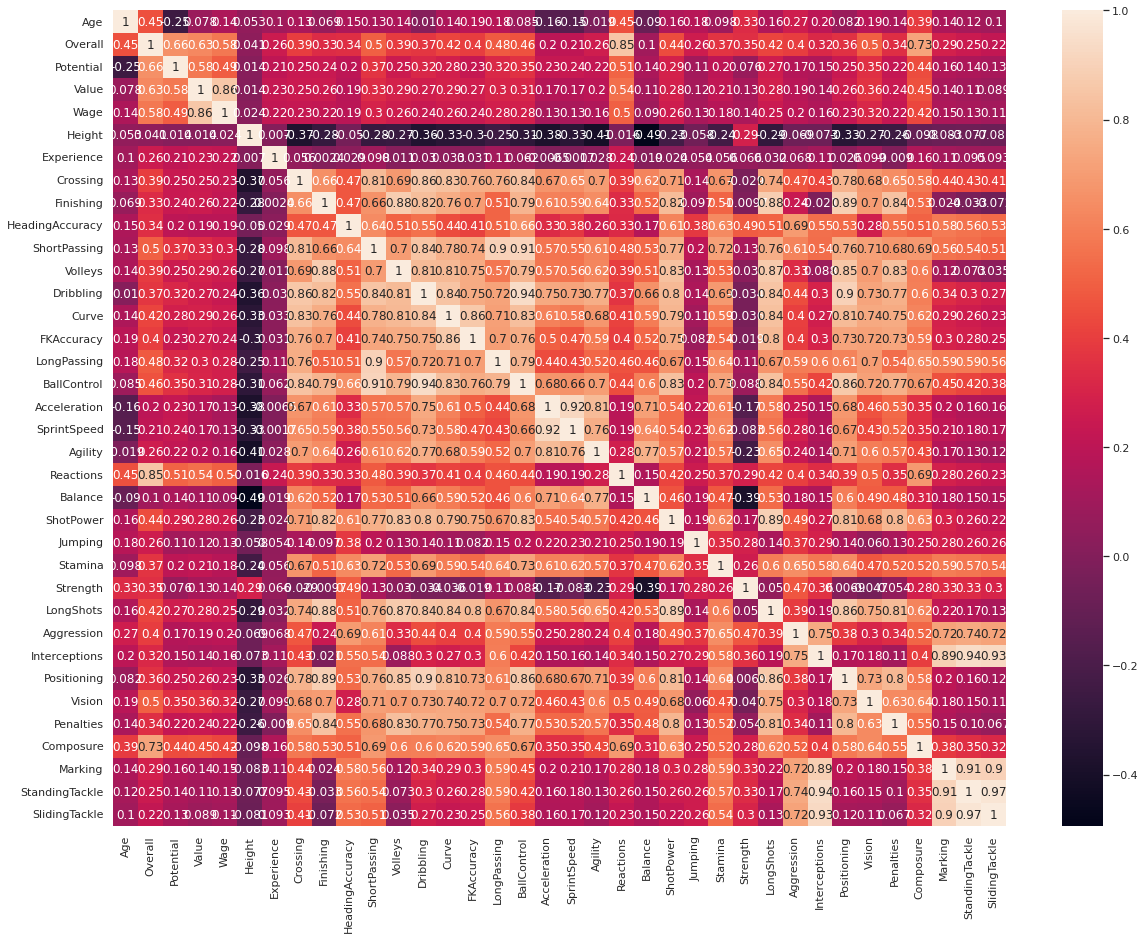

In [243]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(t.corr(),annot=True)


## Finding which different countries are player from 
Since the game is impacted by the whole strength of the team. We are considering the team as whole instead of individual players in finding analysis

In [198]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [199]:
import matplotlib.pyplot as plt

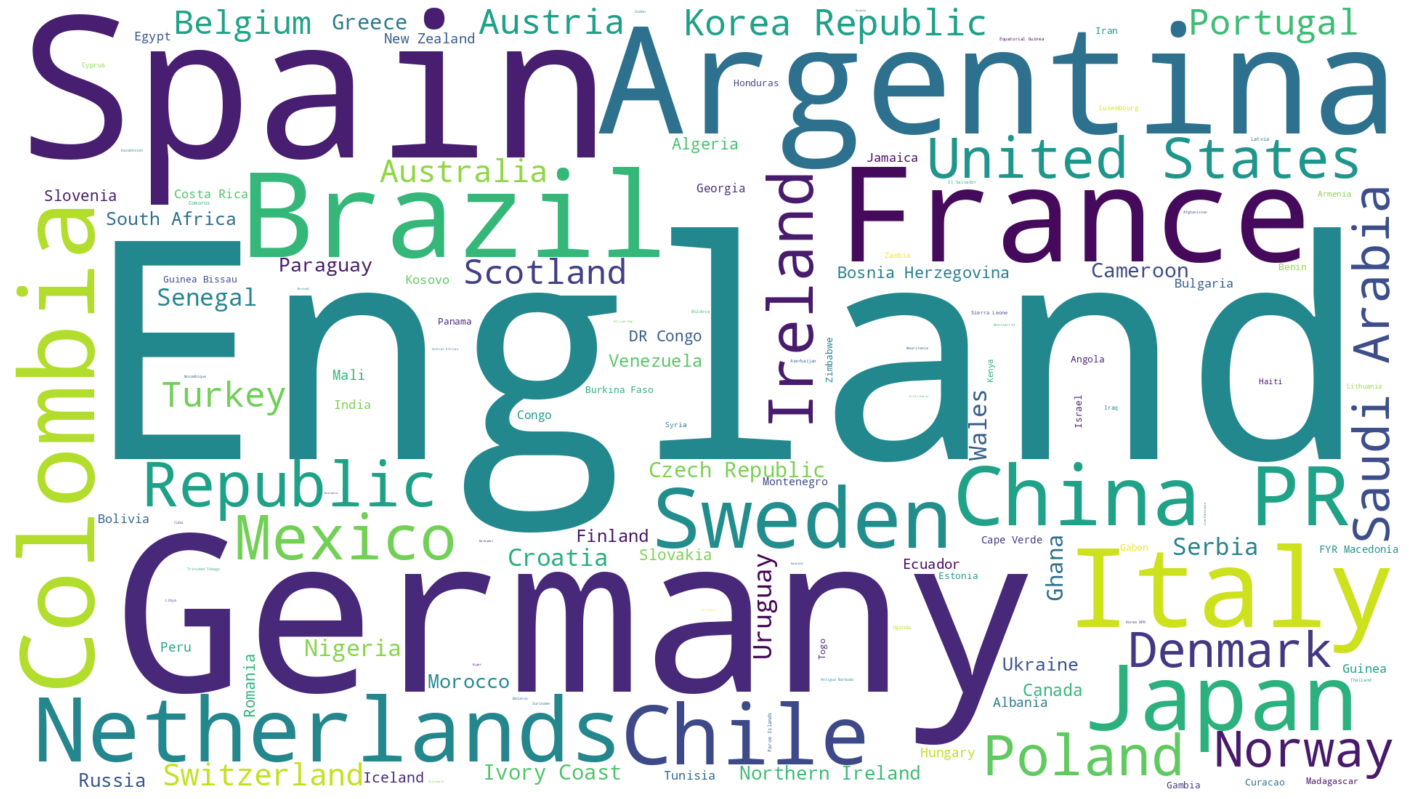

In [200]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Nationality))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [201]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Ex

In [202]:
## Finding club with highest potential
nationality_df = df.groupby('Nationality').mean()
nationality_df

Age    Overall  Potential         Value          Wage  \
Nationality                                                                
Afghanistan  22.500000  61.000000  67.750000  3.425000e+05   1250.000000   
Albania      24.025000  65.925000  71.700000  1.920250e+06   7100.000000   
Algeria      27.050000  70.633333  72.983333  4.670917e+06  18083.333333   
Andorra      28.000000  62.000000  64.000000  2.900000e+05   1000.000000   
Angola       25.866667  67.600000  71.533333  2.018333e+06   7666.666667   
...                ...        ...        ...           ...           ...   
Uzbekistan   29.500000  67.500000  67.500000  3.100000e+06   9000.000000   
Venezuela    24.313433  67.268657  73.149254  2.498333e+06   6916.666667   
Wales        24.736434  64.139535  69.968992  1.769258e+06  12187.500000   
Zambia       22.222222  65.222222  73.777778  1.129444e+06   3444.444444   
Zimbabwe     26.846154  69.769231  72.461538  2.780769e+06   6846.153846   

                 Special  International Reputation  Weak Foot  Skill Moves  \
Nationality                                                                  
Afghanistan  1613.250000                  1.000000   2.750000     2.500000   
Albania      1643.475000                  1.102564   3.102564     2.487179   
Algeria      1723.716667                  1.300000   3.133333     2.816667   
Andorra      1517.000000                  1.000000   3.000000     2.000000   
Angola       1707.000000                  1.133333   3.066667     2.933333   
...                  ...                       ...        ...          ...   
Uzbekistan   1813.500000                  1.000000   3.500000     2.500000   
Venezuela    1611.462687                  1.106061   3.060606     2.530303   
Wales        1547.666667                  1.093023   2.875969     2.248062   
Zambia       1624.666667                  1.000000   2.777778     2.333333   
Zimbabwe     1768.692308                  1.000000   3.076923     2.692308   

             Jersey Number  ...    Marking  StandingTackle  SlidingTackle  \
Nationality                 ...                                             
Afghanistan      16.250000  ...  45.750000       48.250000      47.750000   
Albania          20.461538  ...  51.307692       51.282051      48.384615   
Algeria          19.950000  ...  47.800000       49.733333      45.900000   
Andorra          17.000000  ...  54.000000       56.000000      67.000000   
Angola           27.933333  ...  47.733333       42.133333      39.400000   
...                    ...  ...        ...             ...            ...   
Uzbekistan       16.500000  ...  57.500000       69.000000      66.000000   
Venezuela        16.984848  ...  44.893939       43.303030      42.287879   
Wales            18.077519  ...  48.224806       49.341085      46.961240   
Zambia           17.555556  ...  34.888889       36.222222      34.444444   
Zimbabwe         23.692308  ...  51.000000       56.461538      55.000000   

              GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
Nationality                                                                
Afghanistan  13.000000   12.000000   9.250000       8.500000    9.250000   
Albania      13.615385   13.358974  13.589744      13.282051   14.384615   
Algeria      15.866667   15.033333  14.800000      15.183333   15.800000   
Andorra       9.000000    7.000000  12.000000       8.000000    6.000000   
Angola       11.266667    9.733333   9.800000      10.200000   10.200000   
...                ...         ...        ...            ...         ...   
Uzbekistan   13.500000   13.000000  12.500000      10.500000   12.500000   
Venezuela    13.833333   13.287879  13.500000      14.363636   14.287879   
Wales        16.325581   15.937984  16.054264      15.968992   15.875969   
Zambia       10.888889    9.111111   9.555556      10.444444   11.111111   
Zimbabwe     12.230769    9.538462  10.384615      10.846154    9.692308   

             Release Cla

In [203]:
nationality_df.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Height', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Experience'],
      dtype='object')

## Country wise age of players
Minimum age is of Indonesia and maximum is of Oman

In [204]:
fig = px.histogram(y=nationality_df['Age'],x=nationality_df.index)
fig.update_layout(
    margin=dict(l=70, r=70, t=50, b=50),
)

### Finding the age of the famous teams i.e 'FC Barcelona','Chelsea','Juventus','Real Madrid'

In [246]:
t = df[df['Club'].isin(['FC Barcelona','Chelsea','Juventus','Real Madrid'])]
t

Name  Age Nationality  Overall  Potential          Club  \
0                 L. Messi   31   Argentina       94         94  FC Barcelona   
1        Cristiano Ronaldo   33    Portugal       94         94      Juventus   
5                E. Hazard   27     Belgium       91         91       Chelsea   
6                L. Modrić   32     Croatia       91         91   Real Madrid   
7                L. Suárez   31     Uruguay       91         91  FC Barcelona   
...                    ...  ...         ...      ...        ...           ...   
14603           B. Gilmour   17    Scotland       61         84       Chelsea   
14646  M. Taylor-Crossdale   18     England       61         79       Chelsea   
15322         G. McEachran   17     England       59         81       Chelsea   
15846             M. Guehi   17     England       58         78       Chelsea   
16806             M. Bulka   18      Poland       56         74       Chelsea   

             Value      Wage  Special Preferred Foot  ...  Marking  \
0      110500000.0  565000.0     2202           Left  ...     33.0   
1       77000000.0  405000.0     2228          Right  ...     28.0   
5       93000000.0  340000.0     2142          Right  ...     34.0   
6       67000000.0  420000.0     2280          Right  ...     60.0   
7       80000000.0  455000.0     2346          Right  ...     62.0   
...            ...       ...      ...            ...  ...      ...   
14603     550000.0    7000.0     1613          Right  ...     41.0   
14646     525000.0    8000.0     1490          Right  ...     28.0   
15322     350000.0    6000.0     1516           Left  ...     38.0   
15846     230000.0    4000.0     1329          Right  ...     60.0   
16806     150000.0    2000.0      885          Right  ...     12.0   

       StandingTackle  SlidingTackle GKDiving GKHandling GKKicking  \
0                28.0           26.0      6.0       11.0      15.0   
1                31.0           23.0      7.0       11.0      15.0   
5                27.0           22.0     11.0       12.0       6.0   
6                76.0           73.0     13.0        9.0       7.0   
7                45.0           38.0     27.0       25.0      31.0   
...               ...            ...      ...        ...       ...   
14603            45.0           47.0      9.0        7.0       9.0   
14646            21.0           17.0      7.0        8.0       8.0   
15322            55.0           52.0      8.0       14.0       7.0   
15846            60.0           59.0      8.0        9.0      11.0   
16806            10.0           14.0     57.0       54.0      56.0   

      GKPositioning  GKReflexes  Release Clause Experience  
0              14.0         8.0     226500000.0       17.0  
1              14.0        11.0     127100000.0        4.0  
5               8.0         8.0     172100000.0        8.0  
6              14.0         9.0     137400000.0        8.0  
7              33.0        37.0     164000000.0        7.0  
...             ...         ...             ...        ...  
14603          13.0        12.0       1600000.0        3.0  
14646          11.0         8.0       1300000.0        3.0  
15322          10.0         5.0        998000.0        2.0  
15846          12.0        12.0        656000.0        3.0  
16806          52.0        59.0        371000.0        3.0  

[124 rows x 82 columns]

In [247]:
t = t[t.Age.notna()]

In [248]:
t = t[t.Club.notna()]

In [249]:
x1 = t[t.Club == 'FC Barcelona'].Age
x2 = t[t.Club == 'Chelsea'].Age
x3 = t[t.Club == 'Juventus'].Age
x4 = t[t.Club == 'Real Madrid'].Age

In [250]:
ff.create_distplot([x1,x2,x3,x4],['FC Barcelona','Chelsa','Juventus','Real Madrid'],curve_type='kde')

Here we can see that the players age of FC Barcelona and Real Madrid are younder than Juventus and Chelsa

## Finding average experience of famous team

In [253]:
t=t[t.Experience.notna()]

In [254]:
x1 = t[t.Club == 'FC Barcelona'].Experience
x2 = t[t.Club == 'Chelsea'].Experience
x3 = t[t.Club == 'Juventus'].Experience
x4 = t[t.Club == 'Real Madrid'].Experience

In [255]:
ff.create_distplot([x1,x2,x3,x4],['FC Barcelona','Chelsa','Juventus','Real Madrid'],curve_type='kde')

Juventus and FC Barcelona have highly experienced players than Chelsa and Real Madrid

## Country wise wage of the players
Maximum average wage is of Domanica Republic and 

In [210]:
fig = px.histogram(y=nationality_df['Wage'],x=nationality_df.index)
fig.update_layout(
    margin=dict(l=70, r=70, t=50, b=50),
)

In [211]:
df[['Wage']].max()

Wage    565000.0
dtype: float64

In [212]:
nationality_df.describe()

Age     Overall   Potential         Value          Wage  \
count  164.000000  164.000000  164.000000  1.630000e+02    163.000000   
mean    25.655131   66.339956   70.512076  2.105820e+06   8406.675037   
std      2.308003    3.415552    3.294534  1.795392e+06   7703.938995   
min     17.000000   56.000000   61.000000  1.100000e+05   1000.000000   
25%     24.461989   63.704613   68.051136  8.158368e+05   3336.754643   
50%     25.238197   66.687500   71.000000  1.725000e+06   6916.666667   
75%     26.434089   68.894186   72.987500  2.899083e+06  11484.751360   
max     36.000000   77.000000   80.500000  1.050000e+07  71000.000000   

           Special  International Reputation   Weak Foot  Skill Moves  \
count   164.000000                164.000000  164.000000   164.000000   
mean   1623.254088                  1.086006    2.955090     2.438213   
std     109.852662                  0.135881    0.272660     0.393035   
min    1249.000000                  1.000000    2.000000     1.000000   
25%    1556.293155                  1.000000    2.833333     2.217929   
50%    1632.271683                  1.038665    3.000000     2.457118   
75%    1685.387097                  1.133944    3.050089     2.645263   
max    1931.000000                  2.000000    4.000000     5.000000   

       Jersey Number  ...     Marking  StandingTackle  SlidingTackle  \
count     164.000000  ...  164.000000      164.000000     164.000000   
mean       19.675407  ...   47.042268       47.526748      45.537179   
std         8.173769  ...    8.694722       10.002013      10.147116   
min         2.000000  ...   18.000000       11.000000      11.000000   
25%        15.921875  ...   43.737500       43.649923      41.437666   
50%        18.902151  ...   47.362296       47.389552      45.337092   
75%        22.042793  ...   50.284144       50.922872      48.325799   
max        77.000000  ...   71.000000       74.000000      70.000000   

         GKDiving  GKHandling   GKKicking  GKPositioning  GKReflexes  \
count  164.000000  164.000000  164.000000     164.000000  164.000000   
mean    14.643784   14.490284   14.142232      14.574680   14.625665   
std      6.861454    5.929798    6.628934       6.649262    7.130718   
min      6.000000    5.000000    5.000000       5.500000    6.000000   
25%     10.666667   11.000000   10.300000      10.800000   10.666667   
50%     13.574359   13.547207   13.484375      14.000000   14.000000   
75%     17.016667   16.720582   16.470529      16.773019   16.931981   
max     74.000000   58.000000   71.000000      73.000000   79.000000   

       Release Clause  Experience  
count    1.610000e+02  161.000000  
mean     3.962327e+06    3.434426  
std      3.634324e+06    1.431850  
min      1.650000e+05    0.000000  
25%      1.344250e+06    2.966667  
50%      3.104919e+06    3.441065  
75%      5.581600e+06    3.911765  
max      2.195000e+07   17.000000  

[8 rows x 47 columns]

In [213]:
nationality_df.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Height', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Experience'],
      dtype='object')

In [214]:
nationality_df.iloc[:,-30:]

Curve  FKAccuracy  LongPassing  BallControl  Acceleration  \
Nationality                                                                  
Afghanistan  54.500000   48.250000    54.000000    60.250000     70.500000   
Albania      49.358974   46.358974    54.307692    60.897436     67.051282   
Algeria      56.150000   52.100000    59.600000    65.250000     65.733333   
Andorra      37.000000   29.000000    58.000000    54.000000     57.000000   
Angola       52.800000   47.000000    53.400000    65.733333     78.600000   
...                ...         ...          ...          ...           ...   
Uzbekistan   53.000000   54.000000    64.500000    70.500000     71.500000   
Venezuela    49.803030   44.151515    52.939394    60.742424     66.772727   
Wales        44.240310   38.713178    51.248062    55.813953     63.139535   
Zambia       48.555556   49.111111    47.666667    62.666667     75.888889   
Zimbabwe     50.307692   44.692308    59.538462    63.076923     77.692308   

             SprintSpeed    Agility  Reactions    Balance  ShotPower  ...  \
Nationality                                                           ...   
Afghanistan    68.000000  76.250000  55.750000  77.250000  53.750000  ...   
Albania        67.846154  66.230769  60.358974  65.974359  57.743590  ...   
Algeria        66.116667  66.866667  65.983333  65.816667  60.750000  ...   
Andorra        71.000000  47.000000  56.000000  53.000000  58.000000  ...   
Angola         78.800000  74.333333  62.466667  68.866667  65.600000  ...   
...                  ...        ...        ...        ...        ...  ...   
Uzbekistan     64.000000  65.500000  69.000000  66.500000  71.500000  ...   
Venezuela      66.833333  65.151515  62.136364  66.121212  59.681818  ...   
Wales          62.891473  62.372093  58.441860  65.279070  50.186047  ...   
Zambia         74.666667  67.000000  59.222222  68.444444  63.666667  ...   
Zimbabwe       78.769231  71.461538  61.538462  70.461538  63.000000  ...   

               Marking  StandingTackle  SlidingTackle   GKDiving  GKHandling  \
Nationality                                                                    
Afghanistan  45.750000       48.250000      47.750000  13.000000   12.000000   
Albania      51.307692       51.282051      48.384615  13.615385   13.358974   
Algeria      47.800000       49.733333      45.900000  15.866667   15.033333   
Andorra      54.000000       56.000000      67.000000   9.000000    7.000000   
Angola       47.733333       42.133333      39.400000  11.266667    9.733333   
...                ...             ...            ...        ...         ...   
Uzbekistan   57.500000       69.000000      66.000000  13.500000   13.000000   
Venezuela    44.893939       43.303030      42.287879  13.833333   13.287879   
Wales        48.224806       49.341085      46.961240  16.325581   15.937984   
Zambia       34.888889       36.222222      34.444444  10.888889    9.111111   
Zimbabwe     51.000000       56.461538      55.000000  12.230769    9.538462   

             GKKicking  GKPositioning  GKReflexes  Release Clause  Experience  
Nationality                                                                    
Afghanistan   9.250000       8.500000    9.250000    6.172500e+05    2.500000  
Albania      13.589744      13.282051   14.384615    3.621784e+06    3.756757  
Algeria      14.800000      15.183333   15.800000    8.768946e+06    3.482143  
Andorra      12.000000       8.000000    6.000000    3.840000e+05    2.000000  
Angola        9.800000      10.200000   10.200000    3.475846e+06    2.615385  
...                ...            ...         ...             ...         ...  
Uzbekistan   12.500000      10.500000   12.500000    6.725000e+06    3.500000  
Venezuela    13.500000      14.363636   14.287879    4.093058e+06    2.942308  
Wales        16.054264      15.968992   15.875969    3.616793e+06    3.810345  
Zambia        9.555556      10.444444   11.111111    2.174000e+06    3.444444  

## Finding the nation wise performance 
By Considering the values of 'HeadingAccuracy', 'FKAccuracy','ShotPower', 'Jumping', 'Stamina', 'Strength'

In [215]:
perf_nat = pd.DataFrame(nationality_df[['HeadingAccuracy', 'FKAccuracy','ShotPower', 'Jumping', 'Stamina', 'Strength']])

In [216]:
fig = px.imshow(perf_nat.corr(),text_auto=True)
fig

In [217]:
perf_nat

HeadingAccuracy  FKAccuracy  ShotPower    Jumping    Stamina  \
Nationality                                                                 
Afghanistan        42.000000   48.250000  53.750000  58.500000  70.000000   
Albania            51.282051   46.358974  57.743590  63.974359  66.358974   
Algeria            55.716667   52.100000  60.750000  66.866667  65.633333   
Andorra            70.000000   29.000000  58.000000  73.000000  64.000000   
Angola             57.866667   47.000000  65.600000  71.533333  63.000000   
...                      ...         ...        ...        ...        ...   
Uzbekistan         53.500000   54.000000  71.500000  70.500000  70.000000   
Venezuela          54.515152   44.151515  59.681818  66.348485  62.545455   
Wales              51.364341   38.713178  50.186047  66.806202  63.155039   
Zambia             55.333333   49.111111  63.666667  71.000000  63.000000   
Zimbabwe           62.923077   44.692308  63.000000  72.769231  71.769231   

              Strength  
Nationality             
Afghanistan  55.250000  
Albania      63.487179  
Algeria      66.900000  
Andorra      75.000000  
Angola       70.066667  
...                ...  
Uzbekistan   69.000000  
Venezuela    64.318182  
Wales        65.240310  
Zambia       64.444444  
Zimbabwe     69.692308  

[164 rows x 6 columns]

In [218]:
perf_nat['Sum'] = perf_nat.sum(axis=1)

In [219]:
t = perf_nat.sort_values(by='Sum')
t

HeadingAccuracy  FKAccuracy  ShotPower  Jumping  \
Nationality                                                             
Oman                        16.000000   11.000000  22.000000     74.0   
Malta                       38.000000   39.000000  45.000000     59.0   
Indonesia                   40.000000   44.000000  47.000000     55.0   
Philippines                 30.500000   23.500000  43.500000     60.5   
Guatemala                   45.666667   29.000000  39.666667     63.0   
...                               ...         ...        ...      ...   
Nicaragua                   63.000000   59.000000  65.000000     74.0   
Central African Rep.        71.000000   47.666667  58.000000     73.0   
Dominican Republic          66.500000   63.500000  75.500000     69.5   
Fiji                        64.000000   63.000000  72.000000     78.0   
São Tomé & Príncipe         67.000000   73.000000  81.000000     61.0   

                        Stamina   Strength    Sum  
Nationality                                        
Oman                  41.000000  64.000000  228.0  
Malta                 52.000000  38.000000  271.0  
Indonesia             44.000000  43.000000  273.0  
Philippines           42.500000  75.500000  276.0  
Guatemala             54.333333  67.333333  299.0  
...                         ...        ...    ...  
Nicaragua             70.000000  77.000000  408.0  
Central African Rep.  73.333333  87.000000  410.0  
Dominican Republic    71.500000  65.500000  412.0  
Fiji                  71.000000  72.000000  420.0  
São Tomé & Príncipe   68.000000  75.000000  425.0  

[164 rows x 7 columns]

In [220]:
t.iplot(kind='bar',y='Sum')

Minimum performance is of Oman and maximum performance is of Fiji

### country wise good goal keepers 

In [257]:
nationality_df = df.groupby('Nationality').mean()
nationality_df

Age    Overall  Potential         Value          Wage  \
Nationality                                                                
Afghanistan  22.500000  61.000000  67.750000  3.425000e+05   1250.000000   
Albania      24.025000  65.925000  71.700000  1.920250e+06   7100.000000   
Algeria      27.050000  70.633333  72.983333  4.670917e+06  18083.333333   
Andorra      28.000000  62.000000  64.000000  2.900000e+05   1000.000000   
Angola       25.866667  67.600000  71.533333  2.018333e+06   7666.666667   
...                ...        ...        ...           ...           ...   
Uzbekistan   29.500000  67.500000  67.500000  3.100000e+06   9000.000000   
Venezuela    24.313433  67.268657  73.149254  2.498333e+06   6916.666667   
Wales        24.736434  64.139535  69.968992  1.769258e+06  12187.500000   
Zambia       22.222222  65.222222  73.777778  1.129444e+06   3444.444444   
Zimbabwe     26.846154  69.769231  72.461538  2.780769e+06   6846.153846   

                 Special  International Reputation  Weak Foot  Skill Moves  \
Nationality                                                                  
Afghanistan  1613.250000                  1.000000   2.750000     2.500000   
Albania      1643.475000                  1.102564   3.102564     2.487179   
Algeria      1723.716667                  1.300000   3.133333     2.816667   
Andorra      1517.000000                  1.000000   3.000000     2.000000   
Angola       1707.000000                  1.133333   3.066667     2.933333   
...                  ...                       ...        ...          ...   
Uzbekistan   1813.500000                  1.000000   3.500000     2.500000   
Venezuela    1611.462687                  1.106061   3.060606     2.530303   
Wales        1547.666667                  1.093023   2.875969     2.248062   
Zambia       1624.666667                  1.000000   2.777778     2.333333   
Zimbabwe     1768.692308                  1.000000   3.076923     2.692308   

             Jersey Number  ...    Marking  StandingTackle  SlidingTackle  \
Nationality                 ...                                             
Afghanistan      16.250000  ...  45.750000       48.250000      47.750000   
Albania          20.461538  ...  51.307692       51.282051      48.384615   
Algeria          19.950000  ...  47.800000       49.733333      45.900000   
Andorra          17.000000  ...  54.000000       56.000000      67.000000   
Angola           27.933333  ...  47.733333       42.133333      39.400000   
...                    ...  ...        ...             ...            ...   
Uzbekistan       16.500000  ...  57.500000       69.000000      66.000000   
Venezuela        16.984848  ...  44.893939       43.303030      42.287879   
Wales            18.077519  ...  48.224806       49.341085      46.961240   
Zambia           17.555556  ...  34.888889       36.222222      34.444444   
Zimbabwe         23.692308  ...  51.000000       56.461538      55.000000   

              GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
Nationality                                                                
Afghanistan  13.000000   12.000000   9.250000       8.500000    9.250000   
Albania      13.615385   13.358974  13.589744      13.282051   14.384615   
Algeria      15.866667   15.033333  14.800000      15.183333   15.800000   
Andorra       9.000000    7.000000  12.000000       8.000000    6.000000   
Angola       11.266667    9.733333   9.800000      10.200000   10.200000   
...                ...         ...        ...            ...         ...   
Uzbekistan   13.500000   13.000000  12.500000      10.500000   12.500000   
Venezuela    13.833333   13.287879  13.500000      14.363636   14.287879   
Wales        16.325581   15.937984  16.054264      15.968992   15.875969   
Zambia       10.888889    9.111111   9.555556      10.444444   11.111111   
Zimbabwe     12.230769    9.538462  10.384615      10.846154    9.692308   

             Release Cla

In [260]:
nationality_df_gk = nationality_df.iloc[::,-7:-2]

In [265]:
nationality_df_gk.sum(axis=1).sort_values().iplot(kind='bar')

* Goal keeping of Oman is 7 times better than Belize

## Finding average release clause of different clubs

In [272]:
df.groupby('Club').mean()['Release Clause'].sort_values().iplot(kind='bar')

Release clause of FC Barcelona and Real Madrid is at highest

## Finding best club based on Overall Performance value and potential

In [276]:
df.groupby('Club').mean()[['Overall','Potential']].sum(axis=1).sort_values().iplot(kind='bar')

FC barcelona and Real Madrid are best

### Finding Top performing country based on Overall Performance value and potential

In [277]:
df.groupby('Nationality').mean()[['Overall','Potential']].sum(axis=1).sort_values().iplot(kind='bar')

UAE and Dominica Republic are best

### Comparing performance based on preferred leg 

In [295]:
t = df[['Name','Overall','Potential','Preferred Foot']].copy()

In [296]:
t.dropna(inplace=True)

In [309]:
px.scatter(data_frame=t,x='Overall',y='Potential',color='Preferred Foot',trendline="lowess")

In [304]:
!pip install statsmodels

     |████████████████████████████████| 9.9 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 2.1 MB/s eta 0:00:01


## Relation between performance and wage

In [398]:
px.scatter(x='Overall',y='Wage',data_frame=df,log_x=True,trendline_options=dict(log_x=True),trendline='ols')

## Relation between potential and talent

In [364]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Ex

In [376]:
df.groupby('Age').mean()[['Overall','Potential']].iplot()

After the age of 30 the Performance and Potential intersect

## Polar plot of the performance

In [322]:
# functions to get the rounded values from different columns
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [324]:
df.fillna(0, inplace = True) # Filling the remaining  missing values with zero
df.head(20)

Name  Age Nationality  Overall  Potential  \
0            L. Messi   31   Argentina       94         94   
1   Cristiano Ronaldo   33    Portugal       94         94   
2           Neymar Jr   26      Brazil       92         93   
3              De Gea   27       Spain       91         93   
4        K. De Bruyne   27     Belgium       91         92   
5           E. Hazard   27     Belgium       91         91   
6           L. Modrić   32     Croatia       91         91   
7           L. Suárez   31     Uruguay       91         91   
8        Sergio Ramos   32       Spain       91         91   
9            J. Oblak   25    Slovenia       90         93   
10     R. Lewandowski   29      Poland       90         90   
11           T. Kroos   28     Germany       90         90   
12           D. Godín   32     Uruguay       90         90   
13        David Silva   32       Spain       90         90   
14           N. Kanté   27      France       89         90   
15          P. Dybala   24   Argentina       89         94   
16            H. Kane   24     England       89         91   
17       A. Griezmann   27      France       89         90   
18      M. ter Stegen   26     Germany       89         92   
19        T. Courtois   26     Belgium       89         90   

                   Club        Value      Wage  Special Preferred Foot  ...  \
0          FC Barcelona  110500000.0  565000.0     2202           Left  ...   
1              Juventus   77000000.0  405000.0     2228          Right  ...   
2   Paris Saint-Germain  118500000.0  290000.0     2143          Right  ...   
3     Manchester United   72000000.0  260000.0     1471          Right  ...   
4       Manchester City  102000000.0  355000.0     2281          Right  ...   
5               Chelsea   93000000.0  340000.0     2142          Right  ...   
6           Real Madrid   67000000.0  420000.0     2280          Right  ...   
7          FC Barcelona   80000000.0  455000.0     2346          Right  ...   
8           Real Madrid   51000000.0  380000.0     2201          Right  ...   
9       Atlético Madrid   68000000.0   94000.0     1331          Right  ...   
10    FC Bayern München   77000000.0  205000.0     2152          Right  ...   
11          Real Madrid   76500000.0  355000.0     2190          Right  ...   
12      Atlético Madrid   44000000.0  125000.0     1946          Right  ...   
13      Manchester City   60000000.0  285000.0     2115           Left  ...   
14              Chelsea   63000000.0  225000.0     2189          Right  ...   
15             Juventus   89000000.0  205000.0     2092           Left  ...   
16    Tottenham Hotspur   83500000.0  205000.0     2165          Right  ...   
17      Atlético Madrid   78000000.0  145000.0     2246           Left  ...   
18         FC Barcelona   58000000.0  240000.0     1328          Right  ...   
19          Real Madrid   53500000.0  240000.0     1311           Left  ...   

    Marking  StandingTackle  SlidingTackle GKDiving GKHandling GKKicking  \
0      33.0            28.0           26.0      6.0       11.0      15.0   
1      28.0            31.0           23.0      7.0       11.0      15.0   
2      27.0            24.0           33.0      9.0        9.0      15.0   
3      15.0            21.0           13.0     90.0       85.0      87.0   
4      68.0            58.0           51.0     15.0       13.0       5.0   
5      34.0            27.0           22.0     11.0       12.0       6.0   
6      60.0            76.0           73.0     13.0        9.0       7.0   
7      62.0            45.0           38.0     27.0       25.0      31.0   
8      87.0            92.0           91.0     11.0        8.0       9.0   
9      27.0            12.0           18.0     86.0       92.0      78.0   
10     34.0            42.0           19.0     15.0        6.0      12.0   
11     72.0            79.0           69.0     10.0       11.0      13.0   
12     90.0            89.0           89.0      6.0        8.0    

In [325]:
df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

In [337]:
df.iloc[0,-8::]

Defending    29
General      89
Mental       71
Passing      87
Mobility     91
Power        74
Rating       94
Shooting     88
Name: 0, dtype: object

In [336]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Ex

In [394]:
fig = px.line_polar( r=df.iloc[0,-8::], theta=df.columns[-8::], line_close=True,title=df.iloc[0,0])
fig.update_traces(fill='toself')
fig.show()

/home/mtech/anaconda3/envs/idp/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [393]:
fig = px.line_polar( r=df.iloc[1,-8::], theta=df.columns[-8::], line_close=True,title=df.iloc[1,0])
fig.update_traces(fill='toself')
fig.show()

/home/mtech/anaconda3/envs/idp/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [395]:
fig = px.line_polar( r=df.iloc[2,-8::], theta=df.columns[-8::], line_close=True,title=df.iloc[2,0])
fig.update_traces(fill='toself')
fig.show()

/home/mtech/anaconda3/envs/idp/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Finding bargain based on Kmeans clustering i.e person with closest performance and different 

In [454]:
from sklearn.cluster import KMeans

In [455]:
X = df[['Overall','Potential','Name','Release Clause']]

In [456]:
kmeans = KMeans(n_clusters=15, random_state=0).fit(X.iloc[::,0:2])

In [457]:
set(kmeans.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

Now finding the lowest Release clause

In [458]:
kmeans.labels_

array([9, 9, 9, ..., 8, 8, 8], dtype=int32)

In [459]:
X['Cluster_id'] = kmeans.labels_

In [461]:
temp = X[X['Cluster_id'].sort_values().isin([9])].sort_values(by='Release Clause')
temp[temp['Release Clause'] != 0.0]

/tmp/ipykernel_55305/2883318183.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Overall  Potential          Name  Release Clause  Cluster_id
318       82         82      Casillas       3000000.0           9
317       82         82       P. Čech       5700000.0           9
152       84         84   A. Barzagli       6900000.0           9
41        88         88     G. Buffon       7400000.0           9
314       82         82    Dani Alves       8900000.0           9
..       ...        ...           ...             ...         ...
25        88         95     K. Mbappé     166100000.0           9
5         91         91     E. Hazard     172100000.0           9
4         91         92  K. De Bruyne     196400000.0           9
0         94         94      L. Messi     226500000.0           9
2         92         93     Neymar Jr     228100000.0           9

[418 rows x 5 columns]

So here we can bargain that Casillas have matching performance with Messi